# Importing Required Modules

In [6]:
# Adding all the require modules
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Reading the dataset and importing it to pandas dataframe

In [3]:
# Reading from the data set

train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

# Visulazing the Pandas Dataframe of the training dataset

In [4]:
train_set.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Statistics of Data Sets
1.Training Data:<br>
Total values = 891.<br>
Columns containing missing values = Age, Cabin, Embarked.<br>

2.Test Data:<br>
Total values = 418.<br>
Columns containing missing values = Age, Fare, Cabin.<br>



In [41]:
# Checking which columns has Null Values
print("Training Dataset")
print('-'*len("Training Dataset"))
print(pd.isnull(train_set).any())
print('-'*40)
print("Test Dataset")
print('-'*len("Test Dataset"))
print(pd.isnull(test_set).any())

Training Dataset
----------------
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
----------------------------------------
Test Dataset
------------
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


In [5]:
# checking for number of empty entries in 'Fare' 
test_set[test_set['Fare'].isnull()] 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [6]:
# Checking the datatypes for various features
train_set.info()
print("-"*40)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [7]:
#Description of columns containing python objects
train_set.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bishop, Mrs. Dickinson H (Helen Walton)",male,1601,G6,S
freq,1,577,7,4,644


### Percentage of people survived from the training set

In [8]:
print("Survival Rate = {:6.3f} %".format(
    train_set[train_set['Survived'] == 1].shape[0]*100/891))

Survival Rate = 38.384 %


### From the Data we can get the information that , the missing age has no relation with not being survived

In [42]:
s = train_set.loc[train_set['Age'].isnull()]

s.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


### We Can See the Survival Rate largely depends on the Port of Embarkment so we can't remove that <br>
#### How to handle the missing data of Embarkment?

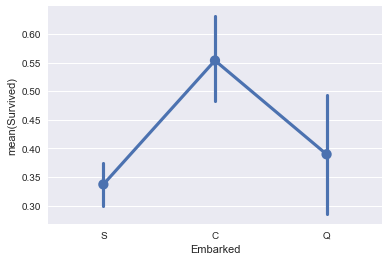

In [40]:
sns.pointplot(x="Embarked", y="Survived", data=train_set);

## Calulate who has the most chances of survival i.e children, women, men

### For that, we have to handle the missing data and convert age into categorical data